<a href="https://colab.research.google.com/github/merajf/merajf.github.io/blob/main/Assignment_3_DL_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Challenge 3


In [ ]:
!pip install keras-rl2 --upgrade -q
!pip install gym -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 5.2 MB/s eta 0:00:00


In [ ]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import EpsGreedyQPolicy  # import the policy
from rl.policy import LinearAnnealedPolicy
from rl.agents.dqn import DQNAgent      # import the DQN agent

In [ ]:
# load the gym module
import gym
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
from keras.optimizers import Adam

ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

/usr/local/lib/python3.9/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


##Warm up 10 & No gamma value

In [ ]:

# setup experience replay buffer
# here the sequential memory limit is set up the same as the nb_steps (number of steps)
# parameter in the fit method.  This means that all the action-states will fit into the
# memory buffer
# keep window_length as 1. It's used in other RL methods, but keep it to 1 in DQNs

memory = SequentialMemory(limit=10000, window_length=1)

policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(0.2), 
                               attr='eps',            
                               value_max=1.,
                               value_min=.1, 
                               value_test=.05,
                               nb_steps=200)

# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
# add extra layers here
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 4)                 0         
                                                                 
 dense_23 (Dense)            (None, 16)                80        
                                                                 
 dense_24 (Dense)            (None, 16)                272       
                                                                 
 dense_25 (Dense)            (None, 2)                 34        
                                                                 
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________
None


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.9/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)

   28/10000: episode: 1, duration: 6.439s, episode steps:  28, steps per second:   4, episode reward: 28.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 0.504225, mae: 0.520064, mean_q: 0.046803, mean_eps: 0.914500
   46/10000: episode: 2, duration: 0.169s, episode steps:  18, steps per second: 106, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.389 [0.000, 1.000],  loss: 0.507460, mae: 0.552046, mean_q: 0.150188, mean_eps: 0.835750


/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 31 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)


   77/10000: episode: 3, duration: 0.282s, episode steps:  31, steps per second: 110, episode reward: 31.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.419 [0.000, 1.000],  loss: 0.483564, mae: 0.561849, mean_q: 0.207288, mean_eps: 0.725500
  132/10000: episode: 4, duration: 0.508s, episode steps:  55, steps per second: 108, episode reward: 55.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.527 [0.000, 1.000],  loss: 0.454622, mae: 0.579936, mean_q: 0.288835, mean_eps: 0.532000
  280/10000: episode: 5, duration: 1.359s, episode steps: 148, steps per second: 109, episode reward: 148.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.507 [0.000, 1.000],  loss: 0.362579, mae: 0.624818, mean_q: 0.505239, mean_eps: 0.171331
  478/10000: episode: 6, duration: 1.773s, episode steps: 198, steps per second: 112, episode reward: 198.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.515 [0.000, 1.000],  loss: 0.223667, mae: 0.842120, mean_q: 1.178703, mean_eps:

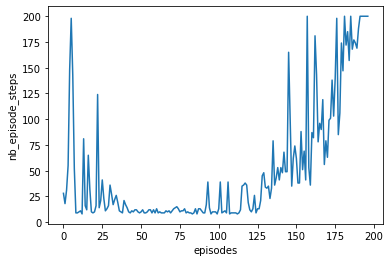

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [ ]:
# define the agent
dqn = DQNAgent(model=model,                   # Q-Network model
               nb_actions=env.action_space.n, # number of actions
               memory=memory,                 # experience replay memory
               nb_steps_warmup=10,            # how many steps are waited before starting experience replay,
               target_model_update=1e-2,      # how often the target network is updated
               policy=policy)                 # the action selection policy

dqn.compile(Adam(learning_rate=.0003), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

### value_min=.4 & learning_rate=.0002

In [ ]:
memory = SequentialMemory(limit=10000, window_length=1)

policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(0.2), 
                               attr='eps',            
                               value_max=1.,
                               value_min=.4, 
                               value_test=.05,
                               nb_steps=200)

# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
# add extra layers here
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 4)                 0         
                                                                 
 dense_24 (Dense)            (None, 16)                80        
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dense_26 (Dense)            (None, 2)                 34        
                                                                 
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________
None


Training for 1000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.9/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.9/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)

  31/1000: episode: 1, duration: 2.738s, episode steps:  31, steps per second:  11, episode reward: 31.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.613 [0.000, 1.000],  loss: 0.520276, mae: 0.537390, mean_q: -0.024490, mean_eps: 0.938500
  50/1000: episode: 2, duration: 0.118s, episode steps:  19, steps per second: 161, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.632 [0.000, 1.000],  loss: 0.506533, mae: 0.549730, mean_q: -0.045345, mean_eps: 0.880000
  87/1000: episode: 3, duration: 0.211s, episode steps:  37, steps per second: 175, episode reward: 37.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.459 [0.000, 1.000],  loss: 0.472664, mae: 0.517763, mean_q: 0.018000, mean_eps: 0.796000
 109/1000: episode: 4, duration: 0.131s, episode steps:  22, steps per second: 168, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.318 [0.000, 1.000],  loss: 0.452102, mae: 0.509415, mean_q: 0.082310, mean_eps: 0.70750

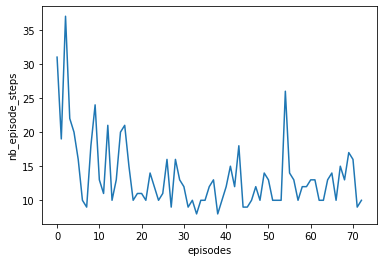

Testing for 20 episodes ...
Episode 1: reward: 9.000, steps: 9
Episode 2: reward: 10.000, steps: 10
Episode 3: reward: 10.000, steps: 10
Episode 4: reward: 10.000, steps: 10
Episode 5: reward: 9.000, steps: 9
Episode 6: reward: 9.000, steps: 9
Episode 7: reward: 9.000, steps: 9
Episode 8: reward: 9.000, steps: 9
Episode 9: reward: 10.000, steps: 10
Episode 10: reward: 9.000, steps: 9
Episode 11: reward: 8.000, steps: 8
Episode 12: reward: 9.000, steps: 9
Episode 13: reward: 9.000, steps: 9
Episode 14: reward: 9.000, steps: 9
Episode 15: reward: 10.000, steps: 10
Episode 16: reward: 10.000, steps: 10
Episode 17: reward: 10.000, steps: 10
Episode 18: reward: 11.000, steps: 11
Episode 19: reward: 9.000, steps: 9
Episode 20: reward: 10.000, steps: 10


In [ ]:
# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=10, # how many steps are waited before starting experience replay,
               target_model_update=1e-2, 
               policy=policy) 

dqn.compile(Adam(learning_rate=.0002), metrics=['mae'])

history = dqn.fit(env, nb_steps=1000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

##Warm up 50 & gamma 0.99

In [ ]:
memory = SequentialMemory(limit=10000, window_length=1)

policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(0.2), 
                               attr='eps',            
                               value_max=1.,
                               value_min=.1, 
                               value_test=.05,
                               nb_steps=200)

# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
# add extra layers here
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________
None


Training for 10000 steps ...
   15/10000: episode: 1, duration: 0.115s, episode steps:  15, steps per second: 131, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.467 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  160/10000: episode: 2, duration: 1.369s, episode steps: 145, steps per second: 106, episode reward: 145.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.517 [0.000, 1.000],  loss: 5.312000, mae: 17.300948, mean_q: 34.461483, mean_eps: 0.527500
  267/10000: episode: 3, duration: 0.684s, episode steps: 107, steps per second: 157, episode reward: 107.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.467 [0.000, 1.000],  loss: 5.799226, mae: 16.570299, mean_q: 33.004069, mean_eps: 0.134486
  366/10000: episode: 4, duration: 0.611s, episode steps:  99, steps per second: 162, episode reward: 99.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.455 [0.000, 1.000],  loss: 3.608364, mae: 16.228690, mean_q: 32.365204, mean_eps: 0.100000
  460/10000: episode: 5, duration: 0.631s, episode steps:  94, steps per second: 149, episode reward: 94.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.457 [0.000, 1.000],  loss: 2.904772, mae: 16.125915, mean_q: 32.148143, m

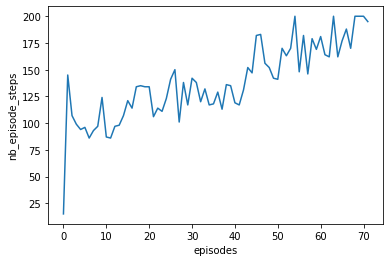

Testing for 20 episodes ...
Episode 1: reward: 194.000, steps: 194
Episode 2: reward: 198.000, steps: 198
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 192.000, steps: 192
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 187.000, steps: 187
Episode 12: reward: 187.000, steps: 187
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 192.000, steps: 192
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [ ]:
# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=50, # how many steps are waited before starting experience replay,
               target_model_update=1e-2, 
               policy=policy,
               gamma=0.99) 

dqn.compile(Adam(learning_rate=.0003), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

##Warm up 55 & gamma 0.99


Training for 10000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   19/10000: episode: 1, duration: 0.298s, episode steps:  19, steps per second:  64, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.526 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   46/10000: episode: 2, duration: 0.022s, episode steps:  27, steps per second: 1237, episode reward: 27.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.593 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   65/10000: episode: 3, duration: 1.303s, episode steps:  19, steps per second:  15, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.474 [0.000, 1.000],  loss: 2.501514, mae: 25.493119, mean_q: 51.051331, mean_eps: 0.730000
  197/10000: episode: 4, duration: 0.947s, episode steps: 132, steps per second: 139, episode reward: 132.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.523 [0.000, 1.000],  loss: 4.095597, mae: 24.675640, mean_q: 49.378635, mean_eps: 0.412750
  277/10000: episode: 5, duration: 0.579s, episode steps:  80, steps per second: 138, episode reward: 80.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.463 [0.000, 1.000],  loss: 4.464411, mae: 24.536321, mean_q: 49.066797, mean_eps: 0.100337
  341/10000: episode: 6, duration: 0.470s, episode steps:  64, steps per second: 136, episode reward: 64.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.453 [0.000, 1.000],  loss: 3.978156, mae: 25.272487, mean_q: 50.565374, me

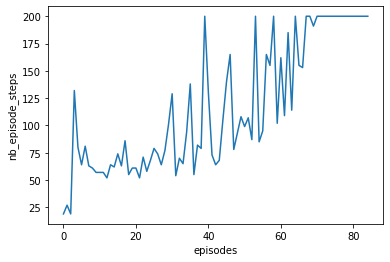

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [ ]:
# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=55, # how many steps are waited before starting experience replay,
               target_model_update=1e-2, 
               policy=policy,
               gamma=0.99) 

dqn.compile(Adam(learning_rate=.0003), metrics=['mae'])

history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

## Warm up 55 & gamma 0.99 but with nb_steps 7000


In [ ]:
memory = SequentialMemory(limit=10000, window_length=1)

policy =  LinearAnnealedPolicy(inner_policy=EpsGreedyQPolicy(0.2), 
                               attr='eps',            
                               value_max=1.,
                               value_min=.1, 
                               value_test=.05,
                               nb_steps=200)

# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
# add extra layers here
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 4)                 0         
                                                                 
 dense_27 (Dense)            (None, 16)                80        
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dense_29 (Dense)            (None, 2)                 34        
                                                                 
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________
None


Training for 7000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   12/7000: episode: 1, duration: 0.953s, episode steps:  12, steps per second:  13, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   73/7000: episode: 2, duration: 3.550s, episode steps:  61, steps per second:  17, episode reward: 61.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.525 [0.000, 1.000],  loss: 4.070912, mae: 12.237512, mean_q: 23.960834, mean_eps: 0.712000
  107/7000: episode: 3, duration: 0.336s, episode steps:  34, steps per second: 101, episode reward: 34.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.529 [0.000, 1.000],  loss: 5.885544, mae: 12.342272, mean_q: 24.045447, mean_eps: 0.597250
  172/7000: episode: 4, duration: 0.593s, episode steps:  65, steps per second: 110, episode reward: 65.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.492 [0.000, 1.000],  loss: 5.256099, mae: 12.318729, mean_q: 24.012841, mean_eps: 0.374500
  224/7000: episode: 5, duration: 0.474s, episode steps:  52, steps per second: 110, episode reward: 52.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.481 [0.000, 1.000],  loss: 5.262971, mae: 12.463736, mean_q: 24.339831, mean_ep

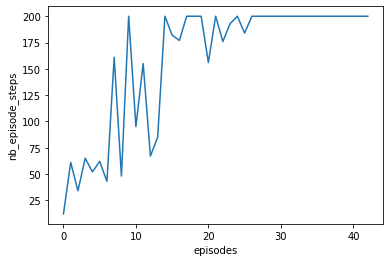

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [ ]:
# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=55, # how many steps are waited before starting experience replay,
               target_model_update=1e-2, 
               policy=policy,
               gamma=0.99) 

dqn.compile(Adam(learning_rate=.0003), metrics=['mae'])

history = dqn.fit(env, nb_steps=7000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)

## Warm up 55 & gamma 0.99 but with nb_steps 6000

Training for 6000 steps ...


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   21/6000: episode: 1, duration: 1.401s, episode steps:  21, steps per second:  15, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.571 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   41/6000: episode: 2, duration: 0.023s, episode steps:  20, steps per second: 855, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.550 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   63/6000: episode: 3, duration: 3.620s, episode steps:  22, steps per second:   6, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 5.777946, mae: 22.876723, mean_q: 46.157059, mean_eps: 0.734500
  263/6000: episode: 4, duration: 1.764s, episode steps: 200, steps per second: 113, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 5.084045, mae: 23.262863, mean_q: 46.961567, mean_eps: 0.312692
  463/6000: episode: 5, duration: 1.791s, episode steps: 200, steps per second: 112, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 7.508859, mae: 23.744461, mean_q: 47.798727, mean_eps: 0.100000
  663/6000: episode: 6, duration: 1.768s, episode steps: 200, steps per second: 113, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.495 [0.000, 1.000],  loss: 5.287035, mae: 23.941380, mean_q: 48.263032, mean

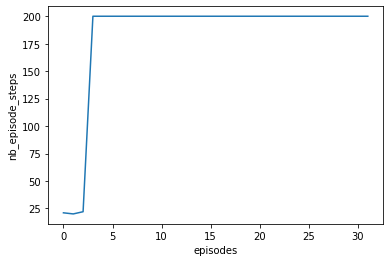

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [ ]:
# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=55, # how many steps are waited before starting experience replay,
               target_model_update=1e-2, 
               policy=policy,
               gamma=0.99) 

dqn.compile(Adam(learning_rate=.0003), metrics=['mae'])

history = dqn.fit(env, nb_steps=6000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)